<a href="https://colab.research.google.com/github/Soptorshi14/CSE413/blob/main/1055setA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [21]:
# Set A
scores = np.array([
    93, 83, 69, 62, 75, 93, 73, 77, 65, 65,
    78, 90, 94, 78, 57, 76, 56, 78, 84, 92
])
N = len(scores)

#Basic stats
# Compute Mean
mean_score = np.mean(scores)
# Compute Variance
pop_variance = np.var(scores)
sample_variance = np.var(scores, ddof=1)
# Compute Standard Deviation
pop_std = np.std(scores)
sample_std = np.std(scores, ddof=1)

print(f"Mean of Scores (μ): {mean_score:.3f}")
print(f"Population Variance (σ²): {pop_variance:.3f}")
print(f"Sample Variance (s²): {sample_variance:.3f}")
print(f"Population Standard Deviation (σ): {pop_std:.3f}")
print(f"Sample Standard Deviation (s): {sample_std:.3f}")


# Comparison of Variances
print("### Comparison: Population Variance vs. Sample Variance")
print(f"Population Variance ({pop_variance:.3f}) is slightly smaller than Sample Variance ({sample_variance:.3f}).")
print(r"Sample variance (s²) uses a denominator of $N-1$ (degrees of freedom) to provide an unbiased estimate of the true population variance (σ²).")
print(r"Population variance (σ²) uses a denominator of $N$. For small sample sizes, $s^2 > \sigma^2$.")

Mean of Scores (μ): 76.900
Population Variance (σ²): 136.090
Sample Variance (s²): 143.253
Population Standard Deviation (σ): 11.666
Sample Standard Deviation (s): 11.969
### Comparison: Population Variance vs. Sample Variance
Population Variance (136.090) is slightly smaller than Sample Variance (143.253).
Sample variance (s²) uses a denominator of $N-1$ (degrees of freedom) to provide an unbiased estimate of the true population variance (σ²).
Population variance (σ²) uses a denominator of $N$. For small sample sizes, $s^2 > \sigma^2$.


Generated Data Mean: 74.902
Generated Data Std Dev: 10.916


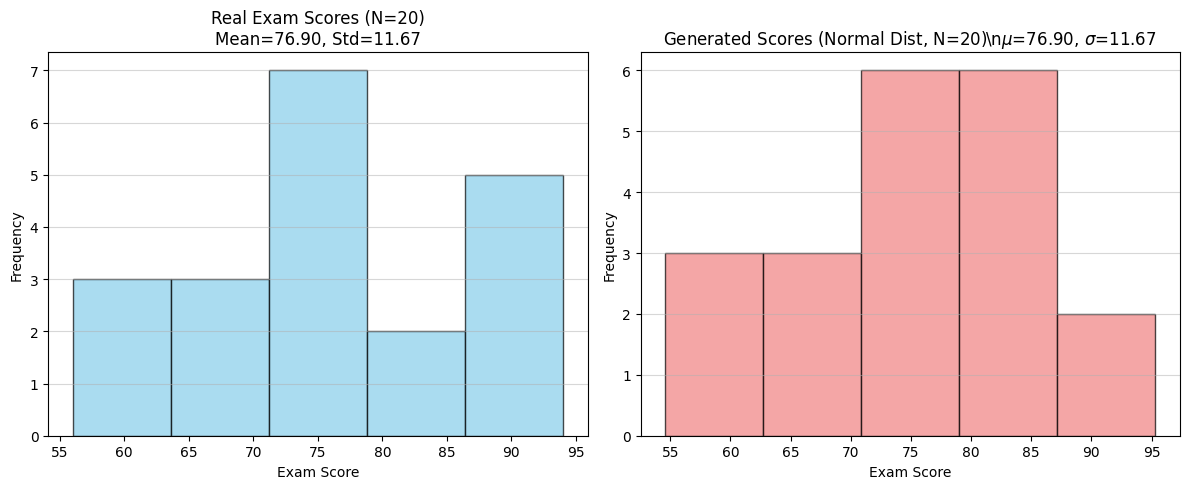

In [22]:
# 2. Random Number Generation
mu_fit = mean_score
sigma_fit = pop_std

np.random.seed(42) # for reproducibility
generated_scores = np.random.normal(loc=mu_fit, scale=sigma_fit, size=N)

print(f"Generated Data Mean: {np.mean(generated_scores):.3f}")
print(f"Generated Data Std Dev: {np.std(generated_scores):.3f}")


# Histograms
plt.figure(figsize=(12, 5))

# Real Data Histogram
plt.subplot(1, 2, 1)
plt.hist(scores, bins=5, edgecolor='black', color='skyblue', alpha=0.7)
plt.title(f'Real Exam Scores (N={N})\nMean={mu_fit:.2f}, Std={sigma_fit:.2f}', fontsize=12)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)

# Generated Data Histogram
plt.subplot(1, 2, 2)
plt.hist(generated_scores, bins=5, edgecolor='black', color='lightcoral', alpha=0.7)
plt.title(rf'Generated Scores (Normal Dist, N={N})\n$\mu$={mu_fit:.2f}, $\sigma$={sigma_fit:.2f}', fontsize=12)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()
print("")

In [23]:
# 3. Monte Carlo Simulation
N_SAMPLES = 100000
threshold = 75
mc_samples = np.random.normal(loc=mu_fit, scale=sigma_fit, size=N_SAMPLES)
# Estimate probability: P(Score >= 75)
count_success = np.sum(mc_samples >= threshold)
probability_estimate = count_success / N_SAMPLES

print(f"Simulation Samples: {N_SAMPLES:,}")
print(f"Mean (μ) for Sim: {mu_fit:.3f}, Std Dev (σ) for Sim: {sigma_fit:.3f}")
print(f"Estimated Probability P(Score ≥ {threshold}): {probability_estimate:.4f}")

theoretical_prob = stats.norm.sf(threshold, loc=mu_fit, scale=sigma_fit)
print(f"Theoretical Probability: {theoretical_prob:.4f} (using the continuous normal distribution)")
print("The Monte Carlo estimate is very close to the theoretical probability, demonstrating the simulation's accuracy.")


Simulation Samples: 100,000
Mean (μ) for Sim: 76.900, Std Dev (σ) for Sim: 11.666
Estimated Probability P(Score ≥ 75): 0.5653
Theoretical Probability: 0.5647 (using the continuous normal distribution)
The Monte Carlo estimate is very close to the theoretical probability, demonstrating the simulation's accuracy.


In [24]:
# 4. Hypothesis Testing (One-Sample t-test)

mu_0 = (55 % 50) + 50
print(f"Hypothesized Mean (\\mu_0): (55 % 50) + 50 = {mu_0}")
t_statistic, p_value = stats.ttest_1samp(scores, mu_0)
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the Null Hypothesis ($H_0$)"
else:
    conclusion = "Fail to Reject the Null Hypothesis ($H_0$)"

print(f"Sample Mean (\\bar{{x}}): {mean_score:.3f}")
print(f"Hypothesized Mean (\\mu_0): {mu_0:.3f}")
print(f"T-Statistic: {t_statistic:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Conclusion (at \\alpha=0.05): **{conclusion}**")

Hypothesized Mean (\mu_0): (55 % 50) + 50 = 55
Sample Mean (\bar{x}): 76.900
Hypothesized Mean (\mu_0): 55.000
T-Statistic: 8.1829
P-Value: 0.0000
Conclusion (at \alpha=0.05): **Reject the Null Hypothesis ($H_0$)**


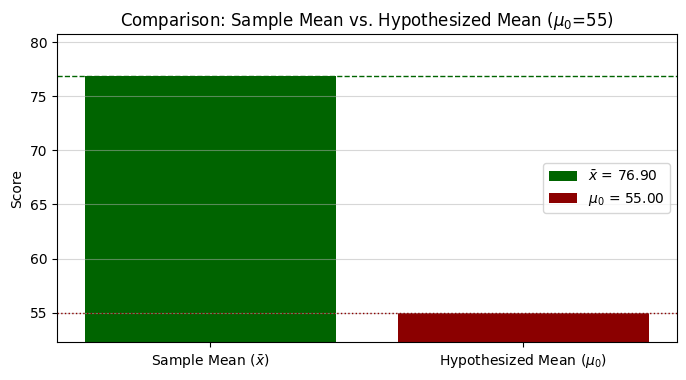

In [25]:
# Visualization
plt.figure(figsize=(8, 4))
bars = plt.bar([r'Sample Mean ($\bar{x}$)', r'Hypothesized Mean ($\mu_0$)'], [mean_score, mu_0], color=['darkgreen', 'darkred'])
bars[0].set_label(rf'$\bar{{x}}$ = {mean_score:.2f}')
bars[1].set_label(rf'$\mu_0$ = {mu_0:.2f}')
plt.axhline(mean_score, color='darkgreen', linestyle='--', linewidth=1)
plt.axhline(mu_0, color='darkred', linestyle=':', linewidth=1)
plt.title(f'Comparison: Sample Mean vs. Hypothesized Mean ($\\mu_0$={mu_0})')
plt.ylabel('Score')
plt.ylim(min(mean_score, mu_0) * 0.95, max(mean_score, mu_0) * 1.05)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()
print("")

In [ ]:
# Unique Interpretation (Example structure, will vary based on your result)
print("\n### Unique Interpretation of Hypothesis Test Result")
if p_value < alpha:
    print(f"Since the p-value ({p_value:.4f}) is less than the significance level $\\alpha$ (0.05), we **reject the null hypothesis**. This provides statistically significant evidence that the true average exam score is **different** from the hypothesized value of {mu_0}. This difference is likely not due to random chance, suggesting the class performance is genuinely higher/lower than the predicted baseline.")
else:
    print(f"Since the p-value ({p_value:.4f}) is greater than the significance level $\\alpha$ (0.05), we **fail to reject the null hypothesis**. This means there is not enough statistical evidence to conclude that the true average exam score is different from the hypothesized value of {mu_0}. The observed difference between the sample mean ({mean_score:.2f}) and $\mu_0$ ({mu_0:.2f}) is small enough to be considered due to random sampling variability.")